In [31]:
import numpy as np
import pandas as pd

In [32]:
us_data = pd.read_csv('data/aggregated_aggregated.csv')

In [33]:
# new_df = us_data.loc[:, ['cast']]
# actors_list = new_df['cast'].to_numpy()

In [34]:
# Calculating the average number of films produced in a year given that they produced at least one film

us_data['year'] = pd.DatetimeIndex(us_data['release_date']).year
in_date = us_data[(us_data['year'] >= 1998) & (us_data['year'] <= 2014)]
df = pd.DataFrame()

#count the number of films each company produced in each year and add to dataframe
for year in range(1998, 2014):
    counter = in_date[in_date['year'] == year]['first_company'].value_counts()
    
    for i in range(len(counter)):
        df.loc[year, counter.index[i]] = counter[i]

# drop if only made one film the entire time because that might be a shell company
no_shell_companies = df.loc[:, (df.sum(axis=0) > 1)]

#calulate mean for each row
df['mean'] = df.mean(axis=1)
no_shell_companies['mean'] = no_shell_companies.mean(axis=1)

print('average with potential for shell companies: {}'.format(np.mean(df['mean'])))
print('average without potential shell companies: {}'.format(np.mean(no_shell_companies['mean'])))

average with potential for shell companies: 1.7737006939067927
average without potential shell companies: 2.12532557690608


/Users/johnfitzpatrick/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [35]:
df = pd.read_csv('data/aggregated_final_clean_actor_istopk_logrev.csv')

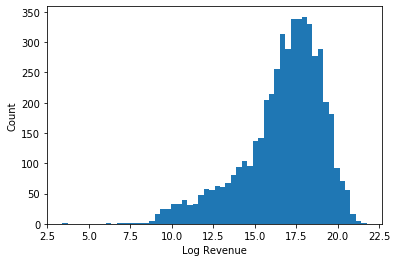

In [36]:
import matplotlib.pyplot as plt

plt.hist(df['log_revenue_final'], bins='auto')
plt.xlabel('Log Revenue')
plt.ylabel('Count');

(0, 1000000000.0)

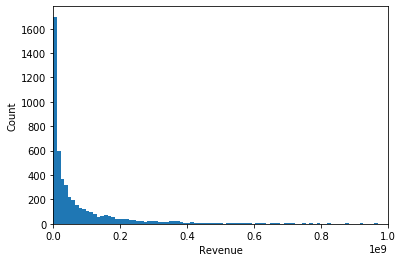

In [37]:
plt.hist(df['revenue'], bins='auto')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.xlim(0,1e9)

In [38]:
df.columns

Index(['id', 'adult', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'cast', 'crew', 'top5_actors',
       'log_revenue', 'usa', 'log_revenue_num', 'first_company',
       'production_company_class', 'gender_score', 'has_oscar_winner',
       'log_budget', 'title_length', 'Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
       'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western',
       'popular_genre', 'collection_name', 'collection', 'first_in_collection',
       'sequel', 'revenue_new', 'budget_final', 'release_year',
       'log_revenue_final',

In [39]:
average_budget = {}
average_revenue = {}

for year in range(1998, 2014):
        average_budget[year] = df[df['release_year'] == year]['budget'].mean()
        average_revenue[year] = df[df['release_year'] == year]['revenue'].mean()

In [40]:
print('Average movie budget 1998-2014: {:.2f}'.format(sum(average_budget.values())/len(average_budget.values())))
print('Average movie revenue 1998-2014: {:.2f}'.format(sum(average_revenue.values())/len(average_revenue.values())))

Average movie budget 1998-2014: 40516305.12
Average movie revenue 1998-2014: 100194888.89


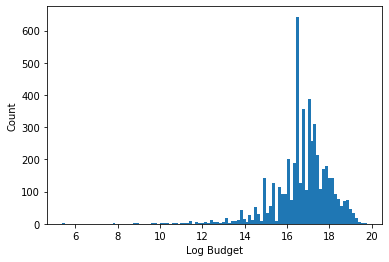

In [42]:
import matplotlib.pyplot as plt

plt.hist(df['log_budget_final'], bins='auto')
plt.xlabel('Log Budget')
plt.ylabel('Count');